<a href="https://colab.research.google.com/github/preethyannthomas/Face-Mask-Detection/blob/main/Face_Mask_Detection_Using_Convolution_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Import Dataset from Kaggle

In [6]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:07<00:00, 27.4MB/s]
100% 163M/163M [00:07<00:00, 24.2MB/s]


In [7]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Import Dependencies

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 # image processing
from google.colab.patches import cv2_imshow # display image in new window
from PIL import Image
from sklearn.model_selection import train_test_split

In [10]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_658.jpg', 'with_mask_1851.jpg', 'with_mask_918.jpg', 'with_mask_3025.jpg', 'with_mask_3163.jpg']
['with_mask_2459.jpg', 'with_mask_704.jpg', 'with_mask_282.jpg', 'with_mask_2083.jpg', 'with_mask_1154.jpg']


In [11]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2259.jpg', 'without_mask_505.jpg', 'without_mask_3345.jpg', 'without_mask_3717.jpg', 'without_mask_3184.jpg']
['without_mask_3335.jpg', 'without_mask_1590.jpg', 'without_mask_951.jpg', 'without_mask_3235.jpg', 'without_mask_1043.jpg']


In [12]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Label the two classes of Images as 1 for having mask and 0 for not

In [13]:
# create the labels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [14]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [15]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [17]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Display Image

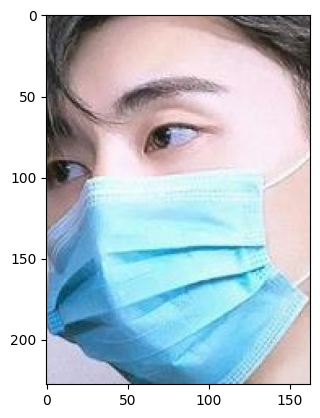

In [18]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

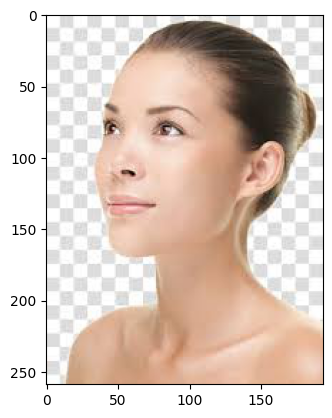

In [19]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

In [20]:
# convert images to numpy arrays+
with_mask_path = '/content/data/with_mask/'
data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [21]:
type(data)

list

In [22]:
len(data)

7553

In [23]:
data[0]

array([[[225, 195, 203],
        [217, 187, 196],
        [209, 180, 190],
        ...,
        [ 99,  22,  78],
        [ 97,  21,  77],
        [ 95,  20,  76]],

       [[238, 207, 217],
        [223, 192, 204],
        [208, 179, 191],
        ...,
        [ 99,  20,  79],
        [ 99,  22,  79],
        [ 99,  22,  78]],

       [[245, 213, 227],
        [223, 192, 207],
        [198, 167, 183],
        ...,
        [ 98,  20,  79],
        [ 98,  20,  78],
        [ 97,  19,  76]],

       ...,

       [[ 20,  15,  19],
        [ 22,  16,  19],
        [ 26,  18,  20],
        ...,
        [ 11,   9,   7],
        [ 10,   9,   7],
        [ 11,  10,   8]],

       [[ 20,  14,  18],
        [ 21,  14,  17],
        [ 23,  13,  16],
        ...,
        [ 11,  10,   8],
        [ 11,  10,   8],
        [ 11,  10,   8]],

       [[ 20,  14,  16],
        [ 20,  12,  15],
        [ 21,  11,  14],
        ...,
        [ 11,   9,   8],
        [ 11,  10,   8],
        [ 11,  10,   8]]

In [24]:
type(data[0])

numpy.ndarray

In [25]:
data[0].shape

(128, 128, 3)

In [26]:
# converting image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [27]:
type(X)

numpy.ndarray

In [28]:
type(Y)

numpy.ndarray

In [29]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [30]:
print(Y)

[1 1 1 ... 0 0 0]


Split data for train and test

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [33]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [34]:
X_train[0]

array([[[ 29,  11,   9],
        [ 22,   8,   5],
        [ 18,   9,   5],
        ...,
        [124,  95,  99],
        [127,  94, 100],
        [129,  94, 100]],

       [[ 25,   9,   9],
        [ 22,   9,   8],
        [ 21,  10,   8],
        ...,
        [123,  98, 102],
        [124,  96, 101],
        [126,  95, 101]],

       [[ 21,   8,   9],
        [ 23,   9,  10],
        [ 23,   9,  10],
        ...,
        [121, 103, 108],
        [122, 101, 106],
        [123, 100, 106]],

       ...,

       [[115,  98, 107],
        [115,  98, 104],
        [114,  98, 100],
        ...,
        [ 89,  39,  36],
        [101,  51,  43],
        [114,  62,  55]],

       [[114,  97, 106],
        [114,  97, 103],
        [111,  95,  98],
        ...,
        [ 73,  33,  33],
        [ 75,  38,  36],
        [ 80,  46,  37]],

       [[111,  94, 103],
        [113,  96, 103],
        [109,  93,  97],
        ...,
        [ 55,  31,  30],
        [ 52,  33,  32],
        [ 49,  35,  23]]

In [35]:
X_train_scaled[0]

array([[[0.11372549, 0.04313725, 0.03529412],
        [0.08627451, 0.03137255, 0.01960784],
        [0.07058824, 0.03529412, 0.01960784],
        ...,
        [0.48627451, 0.37254902, 0.38823529],
        [0.49803922, 0.36862745, 0.39215686],
        [0.50588235, 0.36862745, 0.39215686]],

       [[0.09803922, 0.03529412, 0.03529412],
        [0.08627451, 0.03529412, 0.03137255],
        [0.08235294, 0.03921569, 0.03137255],
        ...,
        [0.48235294, 0.38431373, 0.4       ],
        [0.48627451, 0.37647059, 0.39607843],
        [0.49411765, 0.37254902, 0.39607843]],

       [[0.08235294, 0.03137255, 0.03529412],
        [0.09019608, 0.03529412, 0.03921569],
        [0.09019608, 0.03529412, 0.03921569],
        ...,
        [0.4745098 , 0.40392157, 0.42352941],
        [0.47843137, 0.39607843, 0.41568627],
        [0.48235294, 0.39215686, 0.41568627]],

       ...,

       [[0.45098039, 0.38431373, 0.41960784],
        [0.45098039, 0.38431373, 0.40784314],
        [0.44705882, 0

**Build Convolution Neural Network**

In [36]:
import tensorflow as tf
from tensorflow import keras

In [37]:
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [40]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [41]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 162s 948ms/step - loss: 0.2855 - acc: 0.8856 - val_loss: 0.2669 - val_acc: 0.8975
Epoch 2/5
170/170 [==============================] - 158s 930ms/step - loss: 0.2268 - acc: 0.9086 - val_loss: 0.2671 - val_acc: 0.9074
Epoch 3/5
170/170 [==============================] - 163s 963ms/step - loss: 0.1976 - acc: 0.9220 - val_loss: 0.3046 - val_acc: 0.8959
Epoch 4/5
170/170 [==============================] - 159s 934ms/step - loss: 0.1753 - acc: 0.9343 - val_loss: 0.2802 - val_acc: 0.9008
Epoch 5/5
170/170 [==============================] - 157s 926ms/step - loss: 0.1489 - acc: 0.9439 - val_loss: 0.2279 - val_acc: 0.9025


Model Evaluation

In [42]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 12s 246ms/step - loss: 0.2198 - acc: 0.9159
Test Accuracy = 0.9159497022628784


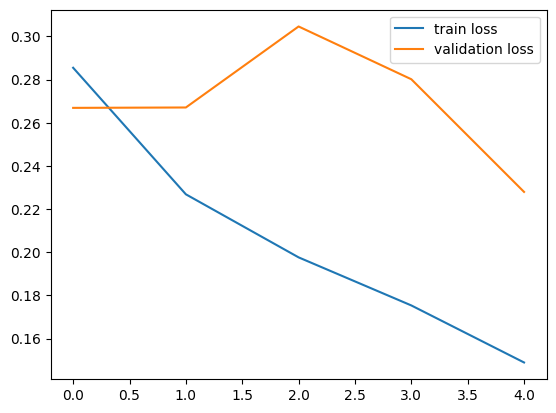

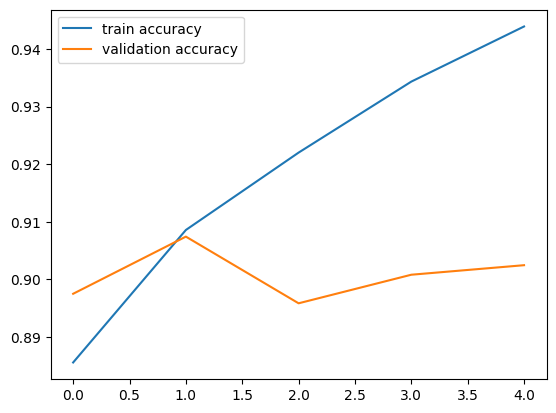

In [43]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: test.jpg


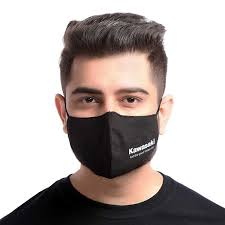

1/1 [==============================] - 0s 136ms/step
[[0.3061834  0.75485206]]
1
The person in the image is wearing a mask


In [50]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')

Path of the image to be predicted: test.png


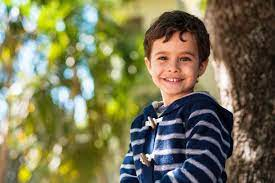

1/1 [==============================] - 0s 31ms/step
[[0.3556778 0.6509547]]
1
The person in the image is wearing a mask


In [51]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')